# Example Workbook 4

## Outline of topics for this segment:

1. Programming the chutes and ladders game
2. Experimenting with it


In [42]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#### *Discussion 1*: The Chutes and Ladders Game ...

 The typical game board, containing 100 squares, is shown below.

<img align="center" src='Figs/Chutes&LaddersImage.png' width="500"/>

**Short version of the rules:**

1. Assume there are N players, who have been ordered according to the order in which they will play by some random means (e.g., by rolling the dice, drawing straws, etc.)

2. Players all start at position 0.

3. At time k (k = 0, 1, 2, ...) the positions of the N players are indicated by p_n(k) for n = 1, 2, 3, ..., N.

4. Starting with player 1, each player throws a die and adds the value shown on the die to his position, i.e., p_1(k+1) = p_1(k) + {the roll of the die}. Then the player moves to that position on the board. If there is no chute or ladder at the new position, he remains there and his turn ends. On the other hand, if there is a chute or a ladder at the new position, the player must climb the ladder or fall down the chute as the case may be .... this change then yields the new position.

5. The first player to reach position 100 exactly wins the game. If a player rolls the die and computes a new position that would take her past 100, then the roll is voided and she remains at her original position.

#### *Discussion 2*: But first how does `random` work?  
Random number generators are covered in many places ... <a href="https://numpy.org/doc/stable/reference/random/index.html?highlight=random%20sampling%20numpy%20random#module-numpy.random" target="_blank">Random Numbers in NumPy</a>.



6
4


(array([3., 0., 2., 0., 0., 0., 1., 0., 2., 0., 2.]),
 array([1.        , 1.45454545, 1.90909091, 2.36363636, 2.81818182,
        3.27272727, 3.72727273, 4.18181818, 4.63636364, 5.09090909,
        5.54545455, 6.        ]),
 <BarContainer object of 11 artists>)

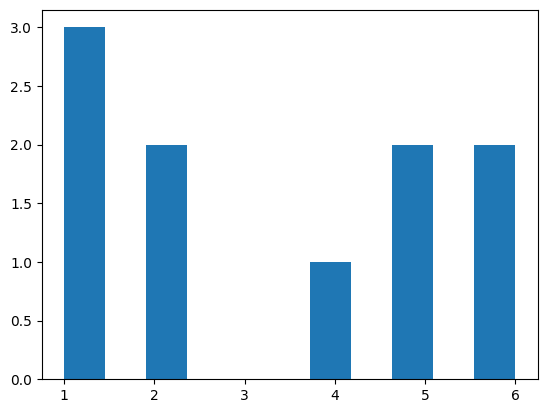

In [9]:
# print(np.random.randint(1,7))
np.random.seed(12345)
# print(np.random.randint(1,6))
# print(np.random.randint(1,6))
# print(np.random.randint(1,6))
# print(np.random.randint(1,6))
# print(np.random.randint(1,6))
# print(np.random.randint(1,6))
np.random.seed(1)


#### *Discussion3*: Roll the dice with a function!  

This function should roll the die and compute the new position of a player on a given board.

In [5]:
# This dictionary stores the chutes and ladders board design.
CandLTable = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

# The function to make a move
def CandL_make_a_move(position,CandLTable):
    roll = np.random.randint(1,6) # roll a die
    if position + roll > 100: # if the roll is too large, stay put
        return position
    position += roll #increment position by roll
    position = CandLTable.get(position, position)#fetch the new position from the dictionary
    return position #return the new position

**How does the `CandLTable` work?**

It is a dictionary, which means a collection of key-value pairs. Keys are positions for each chute or ladder. values are the positions where these tranport players on the board.


It is a dictionary, which means a collection of key-value pairs. Here is a link to `methods` that work with dictionaries ... <a href="https://www.w3schools.com/python/python_ref_dictionary.asp" target="_blank">Dictionary Methods</a>.

Let's try a few ...

In [4]:
# Create a dictionary of farm equipment from the dictionaries of
# individual machines.

FarmEquipment = {"C1": "OldCombine", "C2": "NewCombine", "T1": "Tractor1", "P1": "Pickup", "C3": "FavoriteOldCombineEver"}
print(FarmEquipment)

print(FarmEquipment.keys())
print(FarmEquipment.values())
print(FarmEquipment.items())
# Simplest usage, good for when we know that the referenced key exists ...
print("Get the equipment at C1: ",FarmEquipment.get("C1"))
# What happens if the key does not exist in the dictionary?
print("Get the eqipment at key D1: ",FarmEquipment.get("D1"))

{'C1': 'OldCombine', 'C2': 'NewCombine', 'T1': 'Tractor1', 'P1': 'Pickup', 'C3': 'FavoriteOldCombineEver'}
dict_keys(['C1', 'C2', 'T1', 'P1', 'C3'])
dict_values(['OldCombine', 'NewCombine', 'Tractor1', 'Pickup', 'FavoriteOldCombineEver'])
dict_items([('C1', 'OldCombine'), ('C2', 'NewCombine'), ('T1', 'Tractor1'), ('P1', 'Pickup'), ('C3', 'FavoriteOldCombineEver')])
Get the equipment at C1:  OldCombine
Get the eqipment at key D1:  None


**Nothing happens apparently**, you only get a none value.

This is why we need the second argument in the call to the dictionary. It specifies what to return in the case that the key is missing ...

In [40]:
import random
from random import Random

random.seed(a=None,version=2) # seed the random number generator for repeatability for this module

# This dictionary stores the chutes and ladders board.
CandLTable = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

# The function to make a move
def CandL_make_a_move(position,CandLTable):
    rand = Random(None)#
    roll = rand.randint(1, 6)
    if position + roll > 100:
        return position
    position += roll
    position = CandLTable.get(position, position)
    return position


#### *Discussion 4*: Program Chutes and Ladders Game

Write a program which plays a game between two people until one wins and produces a record of the game play.

Convert your the single game code into a function and then write a program to play a large number of games one after another keeping a record of who won and how long the game lasted. Then compute statistics and/or histograms.

Finally, explore how changes to the positions of chutes and ladders might change the game.

**Basic Game**

Player 1 Wins!!


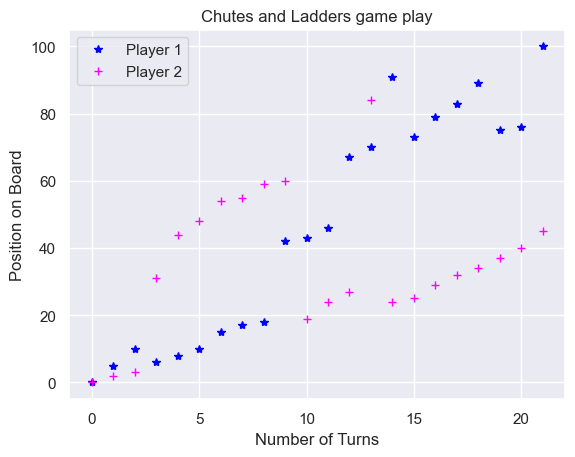

In [43]:
P1 = np.array([0])
P2 = np.array([0])
p1 = 0
p2 = 0
while (p1 < 100 and p2 < 100): # While neither player has won
    p1 = CandL_make_a_move(p1, CandLTable) 
    p2 = CandL_make_a_move(p2, CandLTable)# Player 2 makes a move
    P1 = np.append(P1, p1)
    P2 = np.append(P2, p2) # Record the positions
    if p1 == 100:# If player 1 has won
        print('Player 1 Wins!!')
    elif p2 == 100:# If player 2 has won
        print('Player 2 Wins!!')
# This simply plots the positions of the two players over the
# course of the game.
fig3 = plt.figure()
import seaborn as sns
sns.set_theme()
#the plot defines the marker, color, and label for each player 
plt.plot(P1,'*',color='blue', label='Player 1')
plt.plot(P2,'+', color='magenta',label='Player 2')
plt.xlabel('Number of Turns')
plt.ylabel('Position on Board')
plt.title('Chutes and Ladders game play')
plt.legend()

**Playing many games**

Average number of rounds per game is 27.06
Player 1 won 495 of 1000 games
Player 2 won 505 of 1000 games


Text(0.5, 1.0, 'Histogram of number of turns in 1000 Chutes and Ladders games')

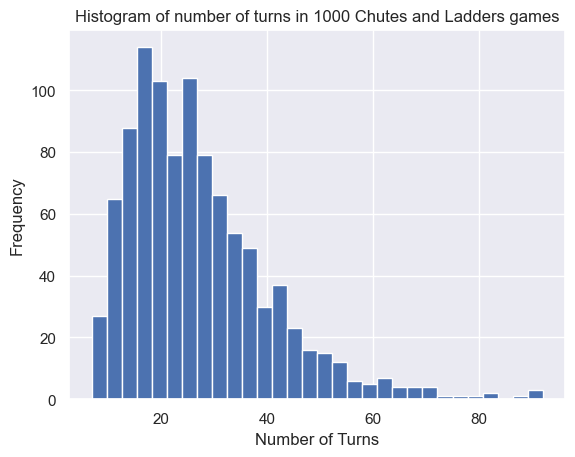

In [47]:
# Convert game code to function with board design as argument
def CandL_play_a_game(CandLTable):
    p1 = 0 # Initialize the position of player 1
    p2 = 0 # Initialize the position of player 2
    Nmoves = 0
    p1wins = 0
    p2wins = 0
    while (p1 < 100 and p2 < 100):
        p1 = CandL_make_a_move(p1, CandLTable)#call the function to make a move for player 1
        p2 = CandL_make_a_move(p2, CandLTable)#call the function to make a move for player 2
        Nmoves += 1
        if p1 == 100:
            p1wins += 1
        elif p2 == 100:
            p2wins += 1
    return Nmoves, p1wins, p2wins     
Ngames = 1000 # Number of games to play
Np1wins = 0# Initialize the number of wins for each player
Np2wins = 0# Initialize the number of wins for each player
GameLengths = np.array([])
for k in range(Ngames):
    L = CandL_play_a_game(CandLTable) # Call the function to play a game
    Np1wins += L[1] # Add the number of wins for each player to the running total
    Np2wins += L[2] # Add the number of wins for each player to the running total
    GameLengths = np.append(GameLengths, L[0])
print('Average number of rounds per game is {:.2f}'.format(np.mean(GameLengths)))
print('Player 1 won {} of {} games'.format(Np1wins,Ngames)) # Print the results by formatting the output within the string
print('Player 2 won {} of {} games'.format(Np2wins,Ngames))
plt.hist(GameLengths, bins=30)
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.title('Histogram of number of turns in 1000 Chutes and Ladders games')

Modify the table to see it's effect on the game ...

Average number of rounds per game is 84.72
Player 1 won 495 of 1000 games
Player 2 won 505 of 1000 games


Text(0.5, 1.0, 'Histogram of number of turns in 1000 Chutes and Ladders games on a modified board')

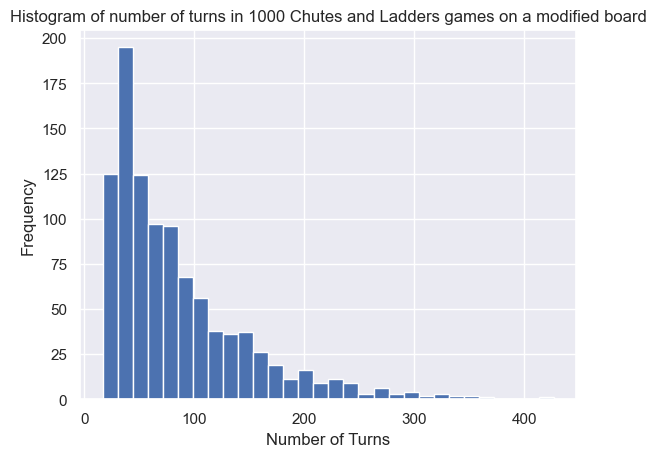

In [48]:
# This dictionary stores the chutes and ladders board.
CandLTable2 = {4:14, 9:31, 16:6, 21:42, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 80:2, 87:24, 93:73, 95:75, 98:78}

Ngames = 1000
Np1wins = 0
Np2wins = 0

GameLengths = np.array([])

for k in range(Ngames):
    L = CandL_play_a_game(CandLTable2)
    Np1wins += L[1]
    Np2wins += L[2]
    GameLengths = np.append(GameLengths, L[0])
    
print('Average number of rounds per game is {:.2f}'.format(np.mean(GameLengths)))
print('Player 1 won {} of {} games'.format(Np1wins,Ngames))
print('Player 2 won {} of {} games'.format(Np2wins,Ngames))

plt.hist(GameLengths, bins=30)
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.title('Histogram of number of turns in 1000 Chutes and Ladders games on a modified board')

the new board design increases the average number of turns required to win by 3 times